In [2]:
#import libraries

#libraries for data manipulation
import pandas as pd
import numpy as np
#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
#input the data 
file_path = 'C:/Users/User/Downloads/Data Science Practice/ENB2012_data.csv'

# Open the file with specified encoding and errors handling
with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
    # Use Pandas read_csv with the opened file
    df = pd.read_csv(file)
df.head()


,Relative Compactness,Surface Area,�Wall Area,Roof Area,Overall Height,Orientation,�Glazing Area,Glazing Area Distribution,Heating Load,�Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
#rename features and targets

df.rename(columns={"�Wall Area": "Wall Area","�Glazing Area": "Glazing Area","�Cooling Load": "Cooling Load"},inplace=True)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
#checking for missing values in each column of the dataset
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [7]:
#To check for Zros in the column 
df.eq(0).sum()

Relative Compactness          0
Surface Area                  0
Wall Area                     0
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                 48
Glazing Area Distribution    48
Heating Load                  0
Cooling Load                  0
dtype: int64

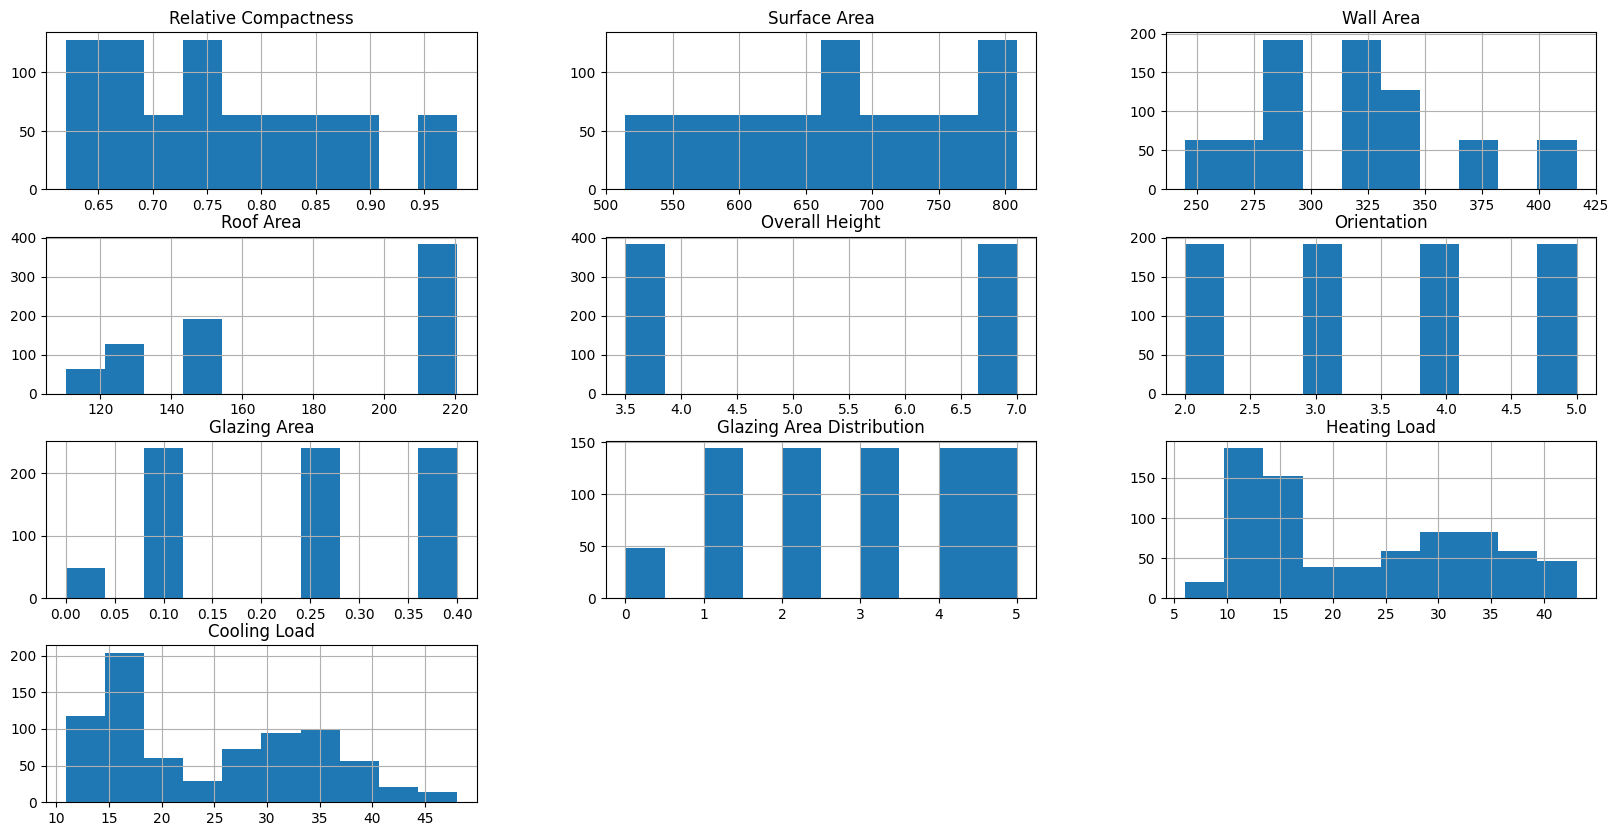

In [8]:
df.hist(figsize = (20,10))
plt.show()

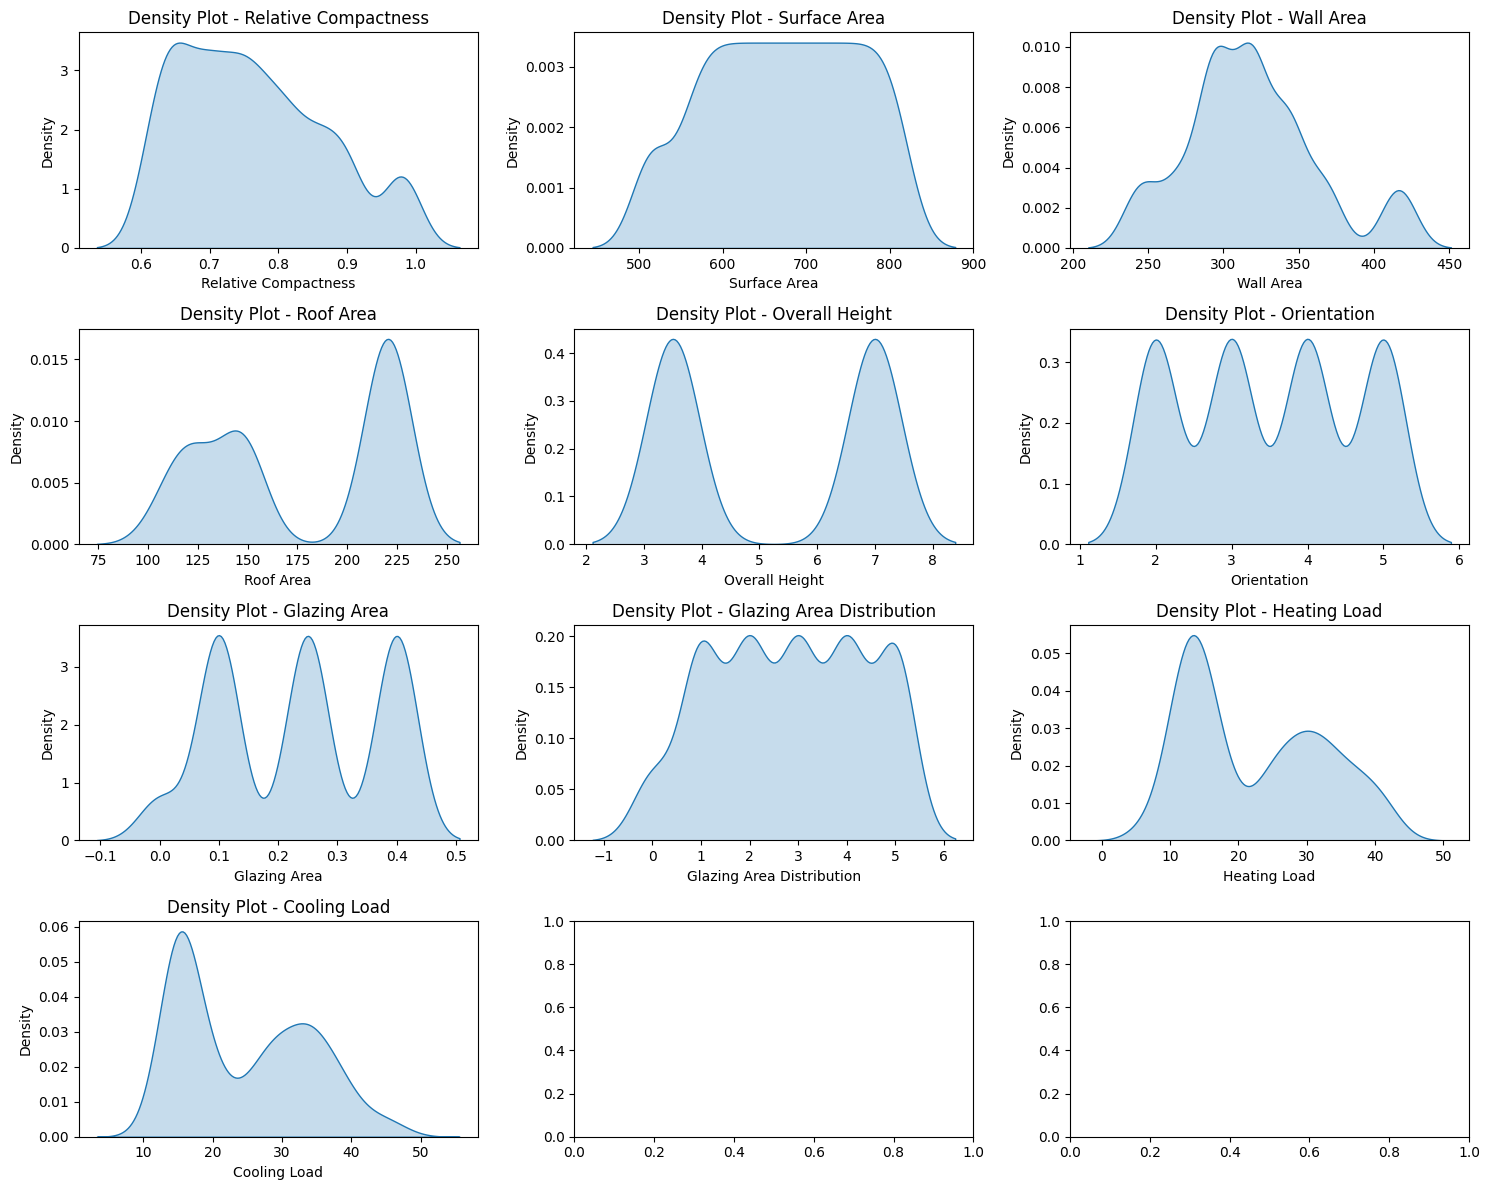

In [9]:
# Set the number of columns per row in the subplot grid
num_cols = 3
# Calculate the number of rows needed for the subplots
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through each column and create a density plot
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], fill=True, ax=axes[i])
    axes[i].set_title(f'Density Plot - {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<Figure size 2500x1500 with 0 Axes>

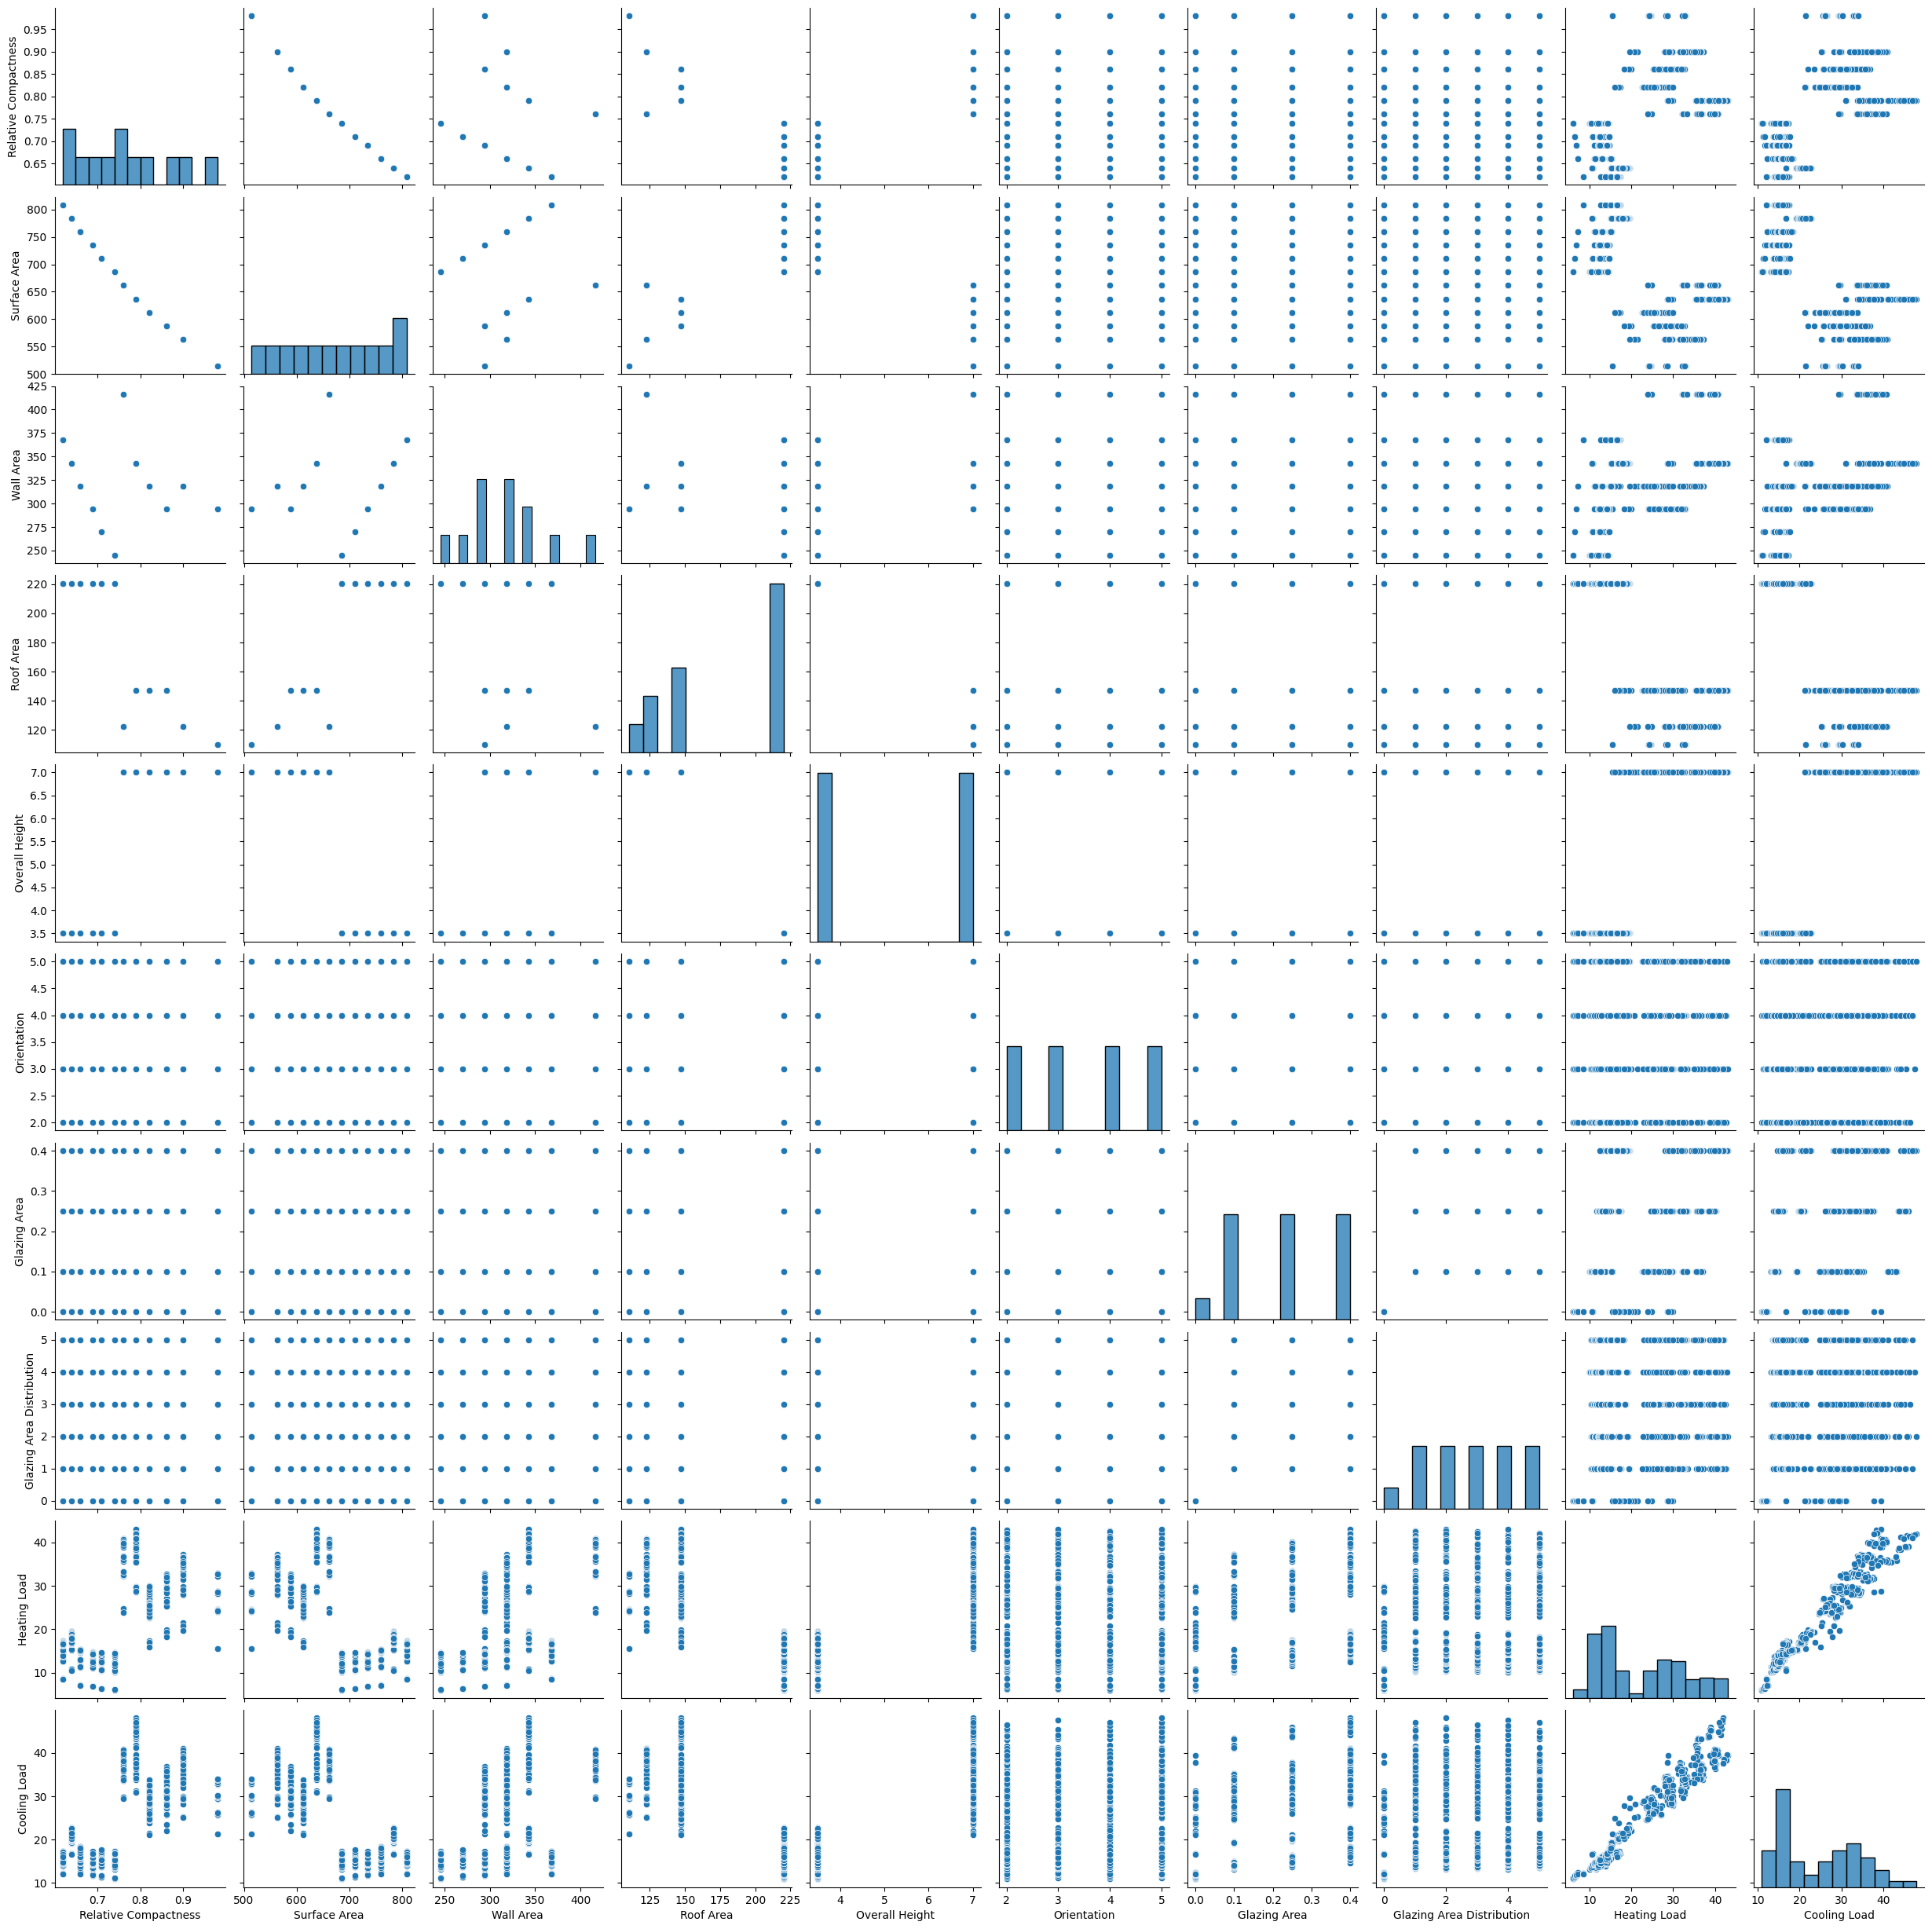

In [10]:
plt.figure(figsize = (25,15))
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


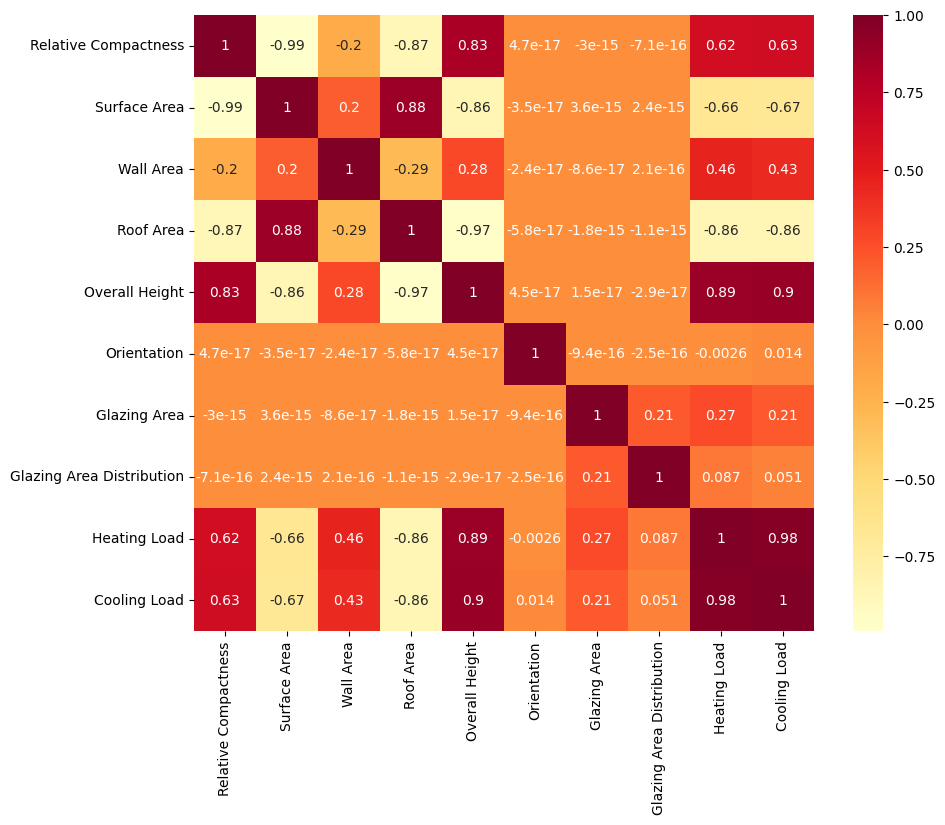

In [12]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15828\975489198.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,1)


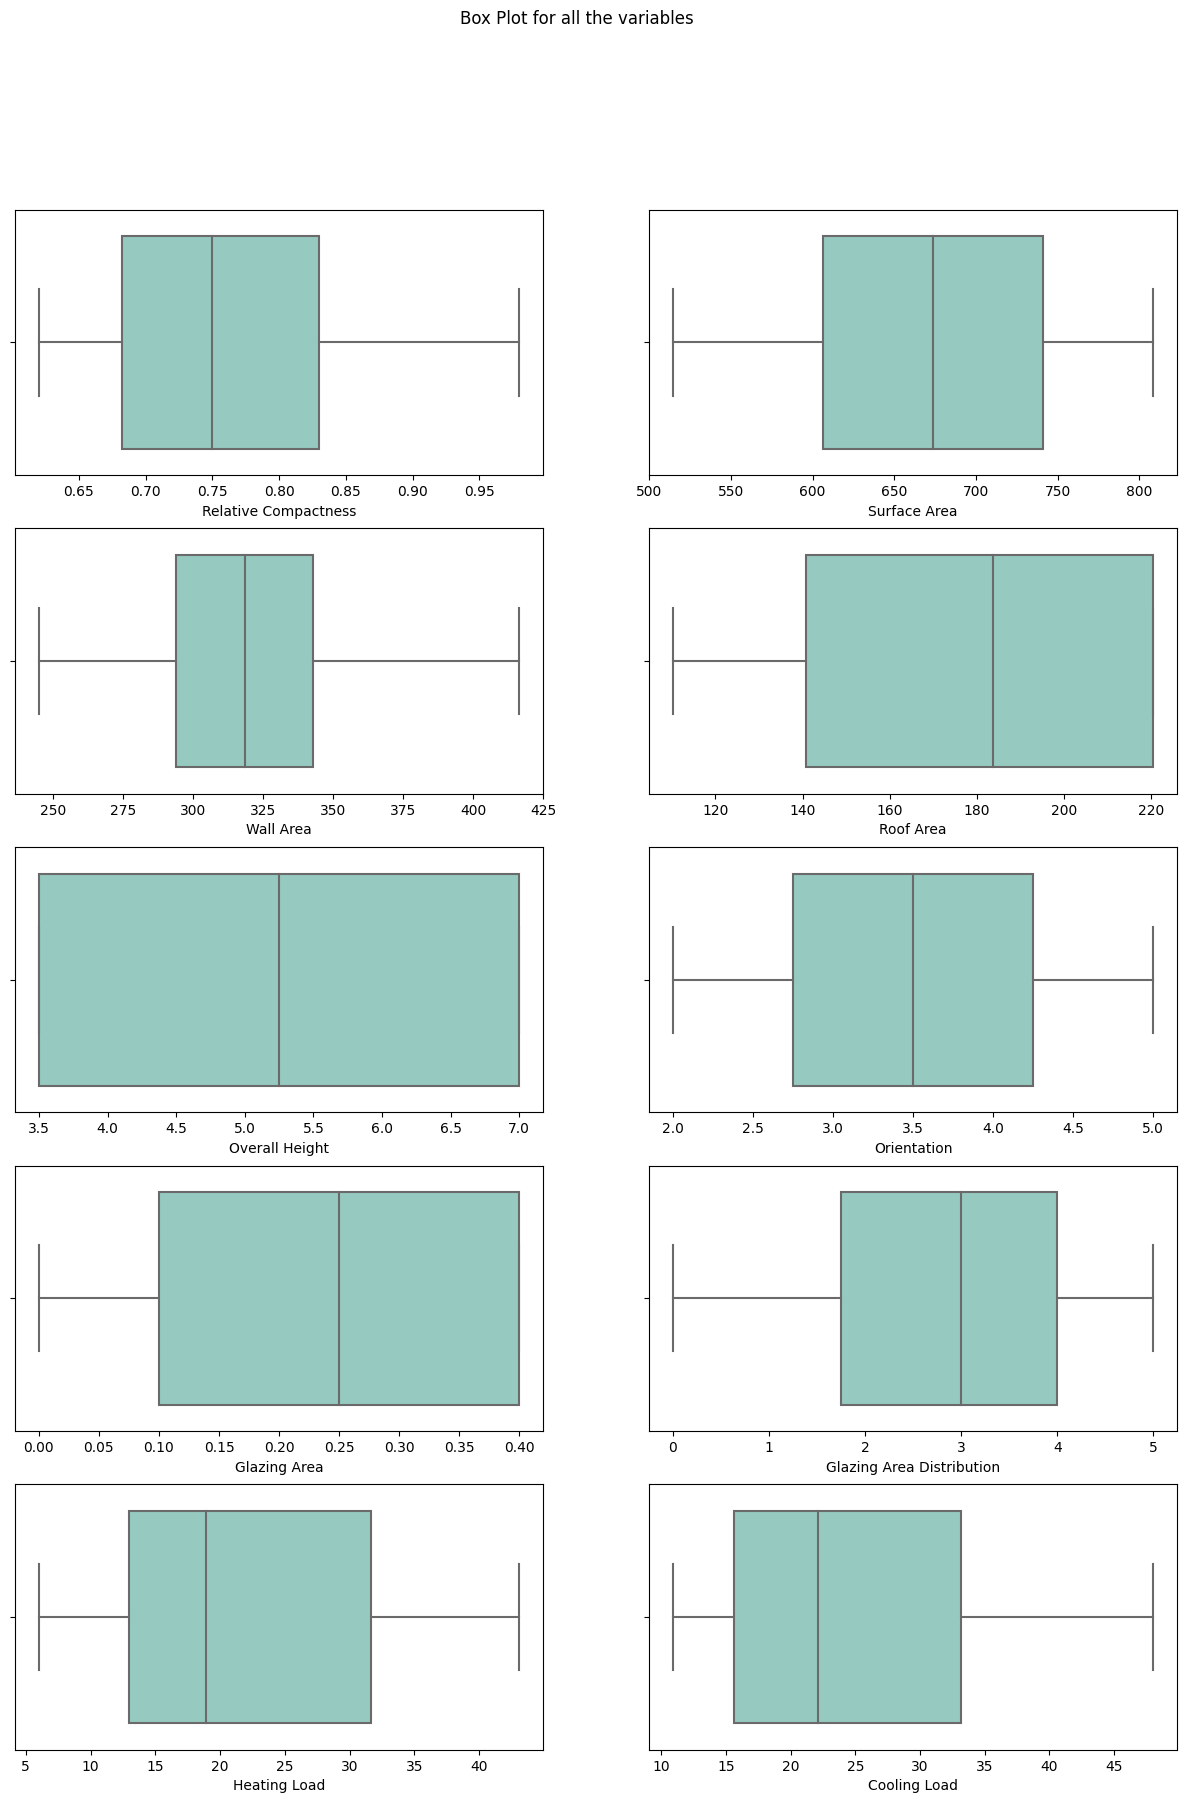

In [13]:
fig, axes = plt.subplots( figsize=(15, 20))
fig.suptitle('Box Plot for all the variables')

plt.subplot(5,2,1)
sns.boxplot(x=df["Relative Compactness"],palette='Set3')

plt.subplot(5,2,2)
sns.boxplot(x=df["Surface Area"],palette='Set3')

plt.subplot(5,2,3)
sns.boxplot(x=df["Wall Area"],palette='Set3')

plt.subplot(5,2,4)
sns.boxplot(x=df["Roof Area"],palette='Set3')

plt.subplot(5,2,5)
sns.boxplot(x=df["Overall Height"],palette='Set3')

plt.subplot(5,2,6)
sns.boxplot(x=df["Orientation"],palette='Set3')

plt.subplot(5,2,7)
sns.boxplot(x=df["Glazing Area"],palette='Set3')

plt.subplot(5,2,8)
sns.boxplot(x=df["Glazing Area Distribution"],palette='Set3')

plt.subplot(5,2,9)
sns.boxplot(x=df["Heating Load"],palette='Set3')

plt.subplot(5,2,10)
sns.boxplot(x=df["Cooling Load"],palette='Set3')

plt.show()

Exploratory Data Analysis Observation 
Both the Heating and Cooling load have the same distribution and relationship with other variables 
I suspect a colinearity issue with relative compactness and surface Area, if i use a linear regression 
Overrall height and Orientaiton  are categorical variables are normally distributed 
Glazing area, Glazing area distribution and roof area are also categorical variable 

In [14]:
#scaling 
df = (df-np.min(df)) / (np.max(df) - np.min(df))
df .head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.001212,0.636364,0.363636,0.136364,0.008658,0.002474,0.0,0.0,0.019233,0.026382
1,0.001212,0.636364,0.363636,0.136364,0.008658,0.003711,0.0,0.0,0.019233,0.026382
2,0.001212,0.636364,0.363636,0.136364,0.008658,0.004947,0.0,0.0,0.019233,0.026382
3,0.001212,0.636364,0.363636,0.136364,0.008658,0.006184,0.0,0.0,0.019233,0.026382
4,0.001113,0.696970,0.393939,0.151515,0.008658,0.002474,0.0,0.0,0.025776,0.034978


In [15]:
X = df[["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",	"Orientation","Glazing Area","Glazing Area Distribution"]]
y = df[["Cooling Load"]]

# Perform the 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#Libariries for the ML algorithm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
#Linear Regression 
Lr = LinearRegression()
Lr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(Lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Lr.score(X_test, y_test)))

Training set score: 0.88
Test set score: 0.89


In [39]:
#ridge regression 
alpha_values = [0.001, 0.1, 1.0, 10.0]

# Try Ridge regression with different alpha values
for alpha in alpha_values:
    print(f'\nRidge Regression with Alpha={alpha}:')
    
    # Create Ridge regression model
    ridge = Ridge(alpha=alpha)
    
    # Train the model using the training sets
    ridge.fit(X_train, y_train)
    print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))



Ridge Regression with Alpha=0.001:
Training set score: 0.80
Test set score: 0.79

Ridge Regression with Alpha=0.1:
Training set score: 0.78
Test set score: 0.77

Ridge Regression with Alpha=1.0:
Training set score: 0.74
Test set score: 0.73

Ridge Regression with Alpha=10.0:
Training set score: 0.45
Test set score: 0.43


In [53]:
#decision tress 
tree = DecisionTreeRegressor(max_depth = 7, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.958


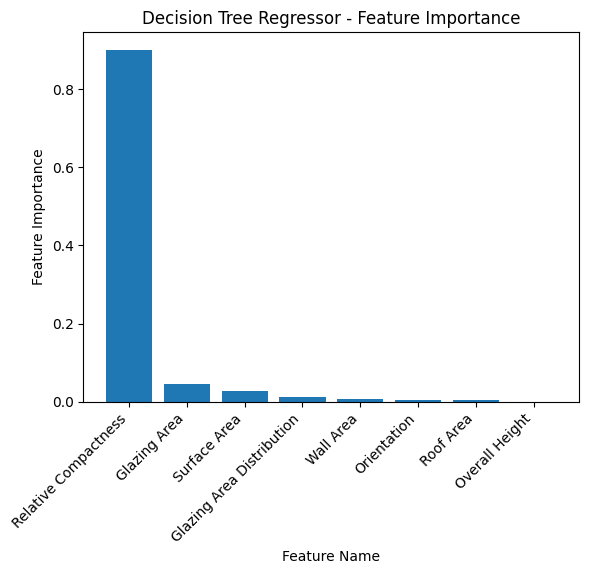

In [65]:
# Plot feature importance with column names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]
feature_importance = tree.feature_importances_

# Create a mapping of feature names to importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Plot the feature importance
plt.bar(range(X.shape[1]), sorted_importance, align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Decision Tree Regressor - Feature Importance")
plt.show()

In [75]:
forest = RandomForestRegressor(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

C:\Users\User\AppData\Local\Temp\ipykernel_15828\2814642210.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Accuracy on training set: 0.996
Accuracy on test set: 0.967


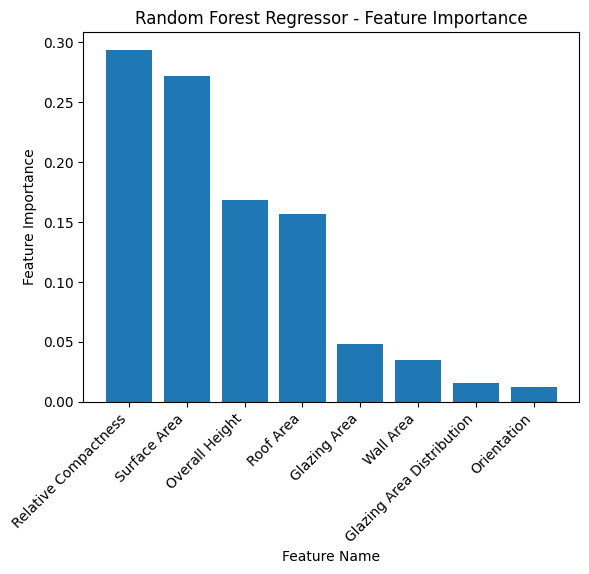

In [76]:
# Assuming your features have column names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]
# Plot feature importance with column names
feature_importance = forest.feature_importances_

# Create a mapping of feature names to importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Plot the feature importance
plt.bar(range(X.shape[1]), sorted_importance, align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Regressor - Feature Importance")
plt.show()

In [78]:
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.981
Accuracy on test set: 0.975


In [93]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=4, learning_rate=0.1, n_estimators= 100)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.993
Accuracy on test set: 0.986


In [94]:
# Make predictions on the testing set
y_pred = gbrt.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.985849129579061
Mean Squared Error: 2.0058684643952617e-06
